In [29]:
import os
import cv2
import numpy as np
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors

### Parte 1 - Função de RBG para Escala de Cinza

In [2]:
img = mpimg.imread(r"C:\Users\JOAO\Documents\fotos_CV\G.jfif")

print(img.shape)

(1280, 960, 3)


In [3]:
def RGB_para_cinza(img):
    pesos = np.array([0.3, 0.4, 0.3])
    nova_imagem = np.dot(img, pesos)
    
    return nova_imagem

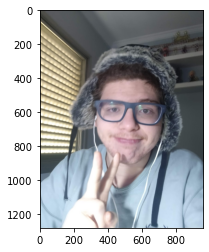

In [4]:
plt.imshow(img)
plt.show()

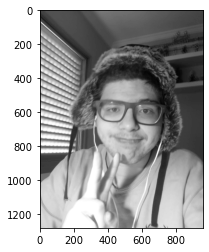

In [5]:
img_cinza = RGB_para_cinza(img)
plt.imshow(img_cinza, cmap = "gray")
plt.show()

### Parte 2 - Aumento de Brilho

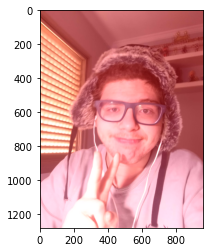

In [6]:
# Utilizei o método add do cv2. Por algum motivo a imagem ficou avermelhada.

img_brilho = cv2.add(img, 100)

plt.imshow(img_brilho)
plt.show()

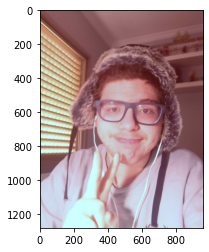

In [7]:
# Reduzi o vermelho manualmente (de uma forma bem burra e com MUITAS iterações por sinal) e ficou melhor.

img_brilho = cv2.add(img, 100)

for i in range(img_brilho.shape[0]):
    for j in range(img_brilho.shape[1]):
        img_brilho[i][j][0] -= 50
        
        

plt.imshow(img_brilho)
plt.show()

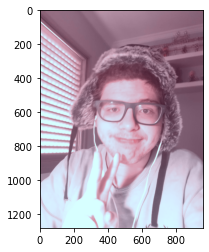

In [8]:
# Acho que assim atingi um resultado bom.

img_brilho = cv2.add(img, 100)

r_channel, g_channel, b_channel = cv2.split(img_brilho)

subtract_value = 40
add_value = subtract_value // 2

r_channel = np.where(r_channel > subtract_value, r_channel - subtract_value, 0)
g_channel = np.where(g_channel < 255 - add_value, g_channel + add_value, 255)
b_channel = np.where(g_channel < 255 - add_value, g_channel + add_value, 255)

img_brilho = cv2.merge((r_channel, g_channel, b_channel))

plt.imshow(img_brilho)
plt.show()

In [9]:
# Função para criar imagem com mais brilho:

def mais_brilho(img):
    img_brilho = cv2.add(img, 100)
    r_channel, g_channel, b_channel = cv2.split(img_brilho)

    subtract_value = 50
    add_value = subtract_value // 2

    r_channel = np.where(r_channel > subtract_value, r_channel - subtract_value, 0)
    g_channel = np.where(g_channel < 255 - add_value, g_channel + add_value, 255)
    b_channel = np.where(g_channel < 255 - add_value, g_channel + add_value, 255)

    img_brilho = cv2.merge((r_channel, g_channel, b_channel))
    
    return img_brilho

### Parte 3 - Diretório

In [10]:
diretorio = r"C:\Users\JOAO\Documents\fotos_CV"

In [11]:
# Imagens dentro de nosso diretório:

for arquivo in os.listdir(diretorio):
    print(arquivo, end = " ")

A.jfif B.png C.jpg D.jpg E.png F.jpg G.jfif H.jpg I.png Mais_Brilho Preto_e_Branco 

In [12]:
# Cria 2 subdiretórios dentro de nosso diretório, que abrigarão as novas imagens modificadas:

pasta_BW = r"C:\Users\JOAO\Documents\fotos_CV\Preto_e_Branco"
pasta_brilho = r"C:\Users\JOAO\Documents\fotos_CV\Mais_Brilho"

for caminho in (pasta_BW, pasta_brilho):
    if not os.path.exists(caminho):
        os.mkdir(caminho)

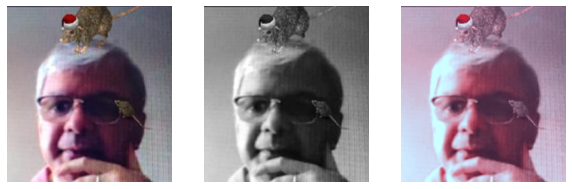

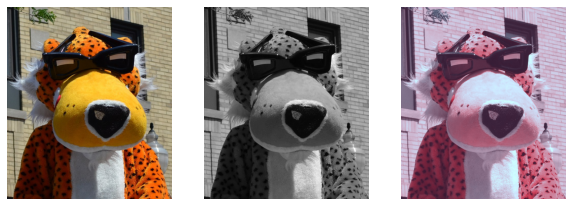

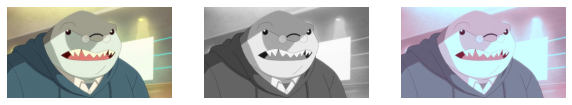

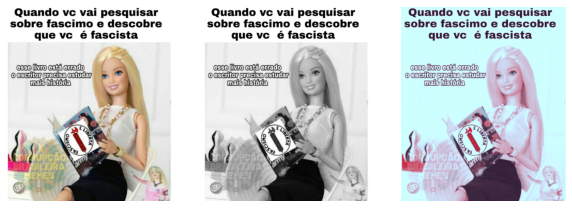

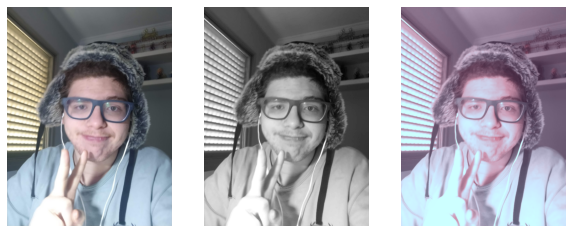

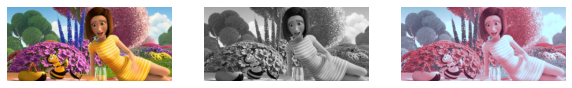

In [30]:
# Aqui eu vejo todas as imagnens dentro do diretorio e, para cada uma delas, adciono os efeitos de preto e branco e
# aumento de luminosidade. Inclusive só tava tentando aumentar o brilho e acabei criando um filtro brabo.

# Não consegui fazer funcionar pra png infelizment.

for arquivo in os.listdir(diretorio):
    caminho = f"{diretorio}\{arquivo}"
    if os.path.isdir(caminho) == False and caminho[-4:] != ".png":
              
        img = mpimg.imread(caminho)
        img2 = RGB_para_cinza(img)
        img3 = mais_brilho(img)
        
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
        axs[0].imshow(img)
        axs[1].imshow(img2, cmap = "gray")
        axs[2].imshow(img3)
        
        for ax in axs:
            ax.axis('off')
        plt.show()